In [1]:
import numpy as np
import random
import thinkstats2
import thinkplot
from scipy import stats as ss

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

<h1>Quiz 3</h1>

Please fill in the bodies of the functions as specified. Please read the instructions closely and ask for clarification if needed. A few notes/tips:
<ul>
<li>Like all the functions we use, the function is a self contained thing. It takes in values as paramaters when called, and produces a return value. All of the inputs that may change should be in that function call, imagine your function being cut/pasted into some other file - it should not depend on anything outside of libraries that it may need. 
<li>Test your function with more than one function call, with different inputs. See an example in comments below the first question. 
<li>If something doesn't work, print or look at the varaibles window. The #1 skill that'll allow you to write usable code is the ability to find and fix errors. Printing a value out line by line so you can see how it changes, and looking for the step where something goes wrong is A-OK and pretty normal. It is boring. 
<li>Unless otherwise specified, you can use outside library functions to calculate things. 
</ul>

<h1>Test Data</h1>

You may notice there's no data specified or attached. You'll need to generate some test data if you want to test your functions. 

The easiest way to generate test data is to use some of the random functions to generate data that looks like what you need. Numpy random and scipy disributions .rvs functions are good places to look, we've also generated random data many times in the past. 

There is no specific requirement on what your data needs to be, it just needs to be good enough to test your function. If you pay attention to what exactly you're calculating and the criteria given, you should be able to create some suitable data for different tests. As an example, for the Hyp Test question, you need two sets of normal data. You can generate some in many ways, one is through scipy:
<ul>
<li>ss.norm.rvs(loc=0, scale=1, size=1, random_state=None)
</ul>
<p>
Since you're checking if there's a significant difference between the two groups, you'd likely want multiple sets of data - two that are very close, so they will not show a difference, and two that are not close, so they will show a difference. Think about what you are checking, then just make some data that will allow you to test that. 

This should not be extremely difficult to code nor should it be super time consuming, the commands are pretty simple and generating random varaibles is pretty similar for any distribution. There is some though involved in saying "what data do I need to check this?" That's something that is pretty important in general, if we are creating something we need to make sure that it works in general, not just one example. Critically, there are not specific sets of data you need - almost anything will work. It is only there to let your functions run and see if they are correct. You don't need to aim for "the perfect test data" or anything like that, just make some data in a list, if it needs to be of a certain distribution, use that dist to get it; if the distribution doesn't matter, just make something. 

<h1>Ski on Chi - 10pts</h1>

You operate a ski hill, and over the years you've seen the distribution of skiers vs snowboarders vs snow skaters etc... change a bit. This is your first full open season since the pandemic hit. When you closed in early 2020, the distribution of your customer base was:
<ul>
<li>Skiers - 40%
<li>Snowboarders - 20%
<li>Snow Skaters - 5%
<li>Non-Active (i.e. sit in the lodger) - 15%
<li>Lesson takers - 20%
</ul>

You are seeing a different pattern now, but you are not sure if that is due to a change in what your customers want or due to just random chance. You want to be able to analytically tell if what you observe each week is a real change from that baseline above, or nothing to worry about. 

In this function you'll take in:
<ul>
<li>Two list of values for the observed number of customers in each group, in the order indicated above. E.g. [35,25,10,10,20].
<li>An alpha value (the cutoff criteria for a p-values)
</ul>
<br><br>
You'll return 3 results:
<ul>
<li>A true/false assessment for if the data appears to show a significant difference in means, measured by if the pValue is less than the supplied alpha. 
<li>The name of the category that MOST EXCEEDS the expectation. 
<li>The name of the cetegory that is MOST EXCEEDED BY the expectation. 
</ul>

In [556]:
def skiCustomersChange(observedCustys=[], alpha=.05):
    expected = [40,20,5,15,20]
    observed = [observedCustys]

    pd, p = ss.chisquare(observed, expected)
    if np.all(p) < alpha:
     isSignificantDiff = True
    else:
     isSignificantDiff = False

    differences = list(np.array(observed) - np.array(expected))
    types = [(expected[0], 'Skiers'), (expected[1], 'Snowboarders'), (expected[2], 'Snow Skaters'),
    (expected[3], 'Inactive'), (expected[4], 'Lesson Takers')]

    types = sorted(types, reverse=False)

    higherThanExp = types[4][1]
    lowerThanExp = types[0][1]
    
    return p, isSignificantDiff, higherThanExp, lowerThanExp

In [557]:
#Example function calls
#list1 = [35,25,10,10,20]
#list2 = [15,40,15,10,20]
#list3 = [40,10,10,10,30]
#diff, highCategory, lowCategory = skiCustomersChange([35,25,10,10,20], .05)
p, diff, highCategory, lowCategory = skiCustomersChange([15,40,15,10,20], .1)
#diff, highCategory, lowCategory = skiCustomersChange(list3, .01)
#print(diff, highCategory, lowCategory)

[nan nan nan nan nan]


<h2>Hypothesis Testing - 10pts</h2>

In this function you'll take in:
<ul>
<li>Two list of values - dataA and dataB. The data will be normally distributed. 
<li>An alpha value (the cutoff criteria for a p-values)
<li>A power value (the likelihood of not getting a false negative)
<li>An effect size value.
</ul>
<br><br>
You'll produce a tuple of 3 results:
<ul>
<li>A true/false assessment for if the data appears to show a significant difference in means, measured by if the pValue is less than the supplied alpha in a t-test.
<li>A true/false assessment for if a hypothesis test has enough power to be reliable, measured by if the power you calculate is greater than the supplied power. 
<li>A true false assessment for if the data appears to show a significant difference in means, measured by if the Cohen effect size is greater than the supplied effect size. 
</ul>

<b>Please report your responses in the format indicated in the template. As well, please report all true/false values as 1/0. 1 is True, 0 is false. To verify if all the criteria are true, someone calling this function should be able to multiply the 3 values in the tuple together and get a result of 1 if they are all true, and 0 otherwise</b>

In [281]:
def strengthOfEffect(dataA, dataB, alpha=.05, power=.8, effectSize=.5):
    from statsmodels.stats.power import TTestPower
    powerTest = TTestPower()
    
    dataA = np.array(ss.norm.rvs(loc=0,scale=1, size=780, random_state=None))
    dataB = np.array(ss.norm.rvs(loc=0,scale=1, size=780, random_state=None))
    
    stat, pval = ss.ttest_ind(dataA, dataB, alternative="greater")
    pval
    if pval < alpha:
        passedPtest = 1
    else:
        passedPtest = 0
        
    ces = thinkstats2.CohenEffectSize(dataA, dataB)
    nobs = len(dataA) + len(dataB)

    pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
    pow, ces
    if pow > power:
     passedPower =  1
    else: 
     passedPower = 0
    if ces > effectSize:
     passedEffectSize = 1
    else:
     passedEffectSize = 0
    results = (passedPtest, passedPower, passedEffectSize)
    
    return results

In [533]:
#Example function calls
oneListOfValues = np.array(ss.norm.rvs(scale=1, size=4568, random_state=None))
anotherListOfValues = np.array(ss.norm.rvs(scale=1, size=4568, random_state=None))
secondListOfValues = np.array(ss.norm.rvs(scale=1, size=4568, random_state=None))
moreListOfValues = np.array(ss.norm.rvs(scale=1, size=4568, random_state=None))
#strengthOfEffect(oneListOfValues, anotherListOfValues, .05, .9, .7)
#strengthOfEffect(secondListOfValues, anotherListOfValues, .03, .7, .4)
strengthOfEffect(oneListOfValues, moreListOfValues, .05, .8, .7)

(0, 0, 0)

In [534]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
dataA = np.array(ss.norm.rvs(loc=0,scale=1, size=780, random_state=None))
dataB = np.array(ss.norm.rvs(loc=0,scale=1, size=780, random_state=None))
    
stat, pval = ss.ttest_ind(dataA, dataB, alternative="greater")
print('p:',pval)
if pval < 0.05:
    passedPtest = 1
else:
    passedPtest = 0
        
ces = thinkstats2.CohenEffectSize(dataA, dataB)
nobs = len(dataA) + len(dataB)

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=0.05)
print('Power:',pow) 
print('ces:', ces)
if pow > .8:
 passedPower =  1
else: 
 passedPower = 0
if ces > .5:
    passedEffectSize = 1
else:
    passedEffectSize = 0
results = (passedPtest, passedPower, passedEffectSize)
print(results)

p: 0.7959229541612374
Power: 0.3802639921250566
ces: -0.041922389608104266
(0, 0, 0)


<h2>Safe Test - 10pts</h2>

In this function you'll take in:
<ul>
<li>Two list of values - dataA and dataB.
</ul>
<br><br>
You'll produce a p-value for a two sided hypothesis test:
<ul>
<li>If the data is not normally distributed, use a Mann-Whitney Test. 
<li>If the data appears to be normally distributed, and the variance differs substantially, use a Welch's t-test.
<li>If none of those conditions are true, use a 'normal' (Student's) t-test. 
<li>Note: The execution of all of these tests are very similar from your persepective. They are all in the scipy documentation - Google for exact details, and the code closely mirrors the examples we did. 
<li>Note 2: If you ever need to use a cutoff for a p-value in the middle of your calculations, please choose something reasonable. There are common defaults for whatever you may need. These defaults are likely shown in the documentation or any examples you may look up. 
</ul>

<b>In any case, the value returned is one number (not in a list, tuple, etc...) that is the pValue performed for that test. 

In [535]:
def flexHypTest(dataA, dataB):
    dataA = np.array(ss.norm.rvs(loc= 0, scale=1, size=800, random_state=None))
    dataB = np.array(ss.norm.rvs(loc=0, scale=1, size=800, random_state=None))
    stat, pValue = ss.ttest_ind(dataA, dataB)

    return pValue

In [537]:
Da = np.array(ss.norm.rvs(loc= 0, scale=1, size=800, random_state=None))
Db = np.array(ss.norm.rvs(loc= 0, scale=1, size=800, random_state=None))
Da.var(), Db.var()

(0.9806278404164002, 1.0138843324753044)

In [538]:
stat, pValue = ss.ttest_ind(Da, Db)
pValue

0.8744975203327153

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


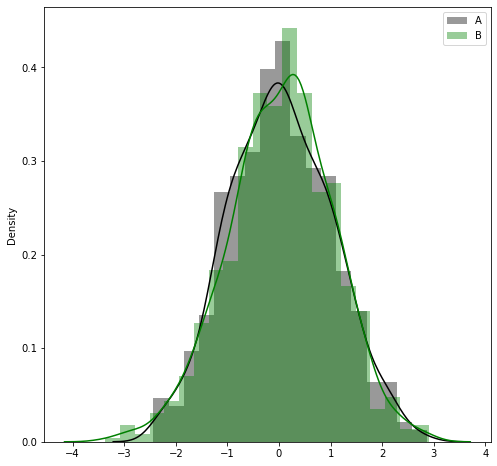

In [539]:
sns.distplot(Da, color='black', label='A')
sns.distplot(Db, color='green', label='B')
thinkplot.Config()
plt.show()

<h1>Grade Distribution - 10pts</h1>

Grade distributions for final letter grades at a school are generally skewed towards the higher end of the scale. We can model it with a function below.

Percentage grades on individual assignments are often skewnormally distributed. (Note: this is more for curved schools than somewhere like NAIT with hard cutoffs. When I was in school CompSci profs would aim for a 50%-60% raw average to get a normal-ish distribution of marks.)

You are seeking to generate a grading system, in two steps:
<ul>
<li>Use the supplied Weibull distribution in the simpleGenerateLetterGradeBuckets function to generate the distribution of letter grades - A,B,C,D,F. We are a simple school and we only have letters, no plus or minus. 
<li>
<li>Use the function simpleGenerateLetterGradeBuckets to tell you HOW MANY slots there are for each grade. This is done for you in the provided function, you just need to call it and get the results. Please pay attention to the n value for number.
<li>Take the supplied raw percentage grades and fit them into those buckets. I.E. if there are 17 slots for an A grade, the 17 highest percentage marks should get an A; if there are then 52 for B, then the next 52 highest get a B, etc...
<li><b>You are going to return a list of tuples - the original percentage grade, and the letter grade. E.g. [(72,B), (84,A), etc...]</b>
</ul>

<br><br>
In this function you'll take in:
<ul>
<li>A list of raw percentage grades, from 0 to 100. E.g. [100,98,24,53,45, etc...]
</ul>

You'll produce:
<ul>
<li>A list of tuples. Each tuple is the original percentage grade, and the letter grade. .
</ul>

<br>
Note: You'll have to run the function cell down at the bottom first. 
<br><br>
<b>Bonus: The provided function for grade buckets probably isn't the best overall, if you can rewrite it to be better, up to 3 bonus marks. Think about the random factor...</b>

In [6]:
def assignLetterGrades(rawPercentageGrades):
    rawPercentageGrades = []
    n= len(rawPercentageGrades) 
    simpleGenerateLetterGradeBuckets(n)
    return listOfTumples

In [7]:
tuples = assignLetterGrades([100,98,24,4,67,22,90])

NameError: name 'simpleGenerateLetterGradeBuckets' is not defined

In [540]:
#Example for 423 students
simpleGenerateLetterGradeBuckets(115)

{'A': 25, 'B': 37, 'C': 36, 'D': 13, 'F': 4}

In [352]:
def simpleGenerateLetterGradeBuckets(n=100):
    #Define distribution params
    c = 1.5
    loc = 3
    scale = 1.5

    #Generate distribution buckets
    aGrades = 0
    bGrades = 0
    cGrades = 0
    dGrades = 0
    fGrades = 0

    #Define cutoffs - count above cut are grade slots. E.g. the number of random results over 3.8 are
    #the number of slots for A. The number remaining over 3 are the slots for B, etc...
    cuts = [3.7, 2.9, 1.9, .9]
    data = 7.2-ss.weibull_min.rvs(c, loc, scale, n)
    
    #Count the number of slots for each letter grade
    for i in range(len(data)):
        tmp = data[i]
        if tmp > cuts[0]:
            aGrades += 1
        elif tmp > cuts[1]:
            bGrades += 1
        elif tmp > cuts[2]:
            cGrades += 1
        elif tmp > cuts[3]:
            dGrades += 1
        else:
            fGrades += 1
    buckets = {"A":aGrades, "B":bGrades, "C":cGrades, "D":dGrades, "F":fGrades}
    return buckets